# Prediction of Home Loan Status Eligibility using Machine Learning

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

Steps are:
Gathering Data
Exploratory Data Analysis
Data Visualizations
Machine Learning Model Decision.
Traing the ML Model
Predict Model

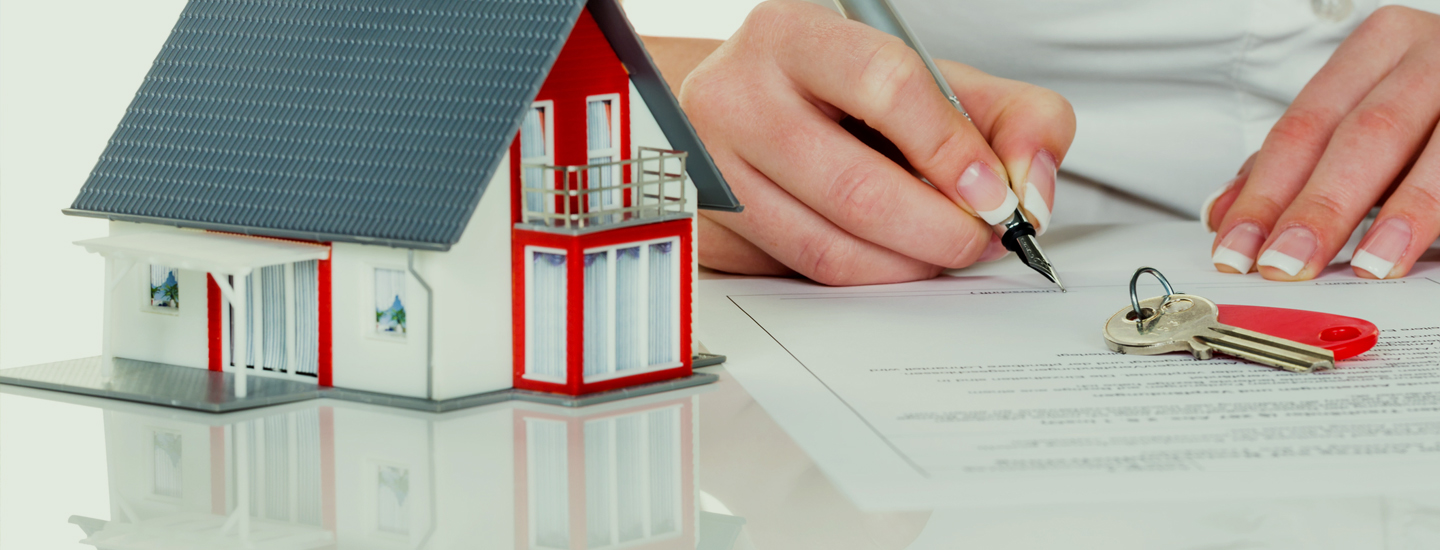

In a Simple Term, Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.

Dataset Key Information.
Loan_ID--------------> Unique Loan ID.
Gender --------------> Male/ Female
Married --------------> Applicant married (Y/N)
Dependents ------------> Number of dependents
Education -------------> Applicant Education (Graduate/ Under Graduate)
Self_Employed ---------> Self-employed (Y/N)
ApplicantIncome -------> Applicant income
CoapplicantIncome -----> Coapplicant income
LoanAmount -----------> Loan amount in thousands
Loan_Amount_Term ------> Term of a loan in months
Credit_History --------> Credit history meets guidelines
Property_Area ---------> Urban/ Semi-Urban/ Rural
Loan_Status -----------> Loan approved (Y/N)

Getting the System Ready and Loading the Data

# importing all required libraries

In [1]:
import pandas as pd   
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Gathering Data

# Loading and Reading the dataset

In [2]:
loan_data = pd.read_csv('loan (2).csv')

# understanding the data

In [3]:
loan_data.shape


(614, 13)

In [4]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#storing the Loan_ID in another dataset for future use
data=pd.DataFrame()
data['ID']=loan_data['Loan_ID']
data.head()

,ID
0,LP001002
1,LP001003
2,LP001005
3,LP001006
4,LP001008


In [7]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# finding missing values and replacing them

In [9]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# fill the missing values for numerical terms - mean
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean())

In [11]:
# fill the missing values for categorical terms - mode
loan_data['Gender'] = loan_data["Gender"].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data["Married"].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data["Dependents"].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data["Self_Employed"].fillna(loan_data['Self_Employed'].mode()[0])

In [12]:
loan_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

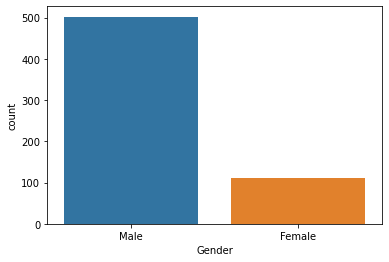

In [13]:
# categorical attributes visualization
sns.countplot(loan_data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

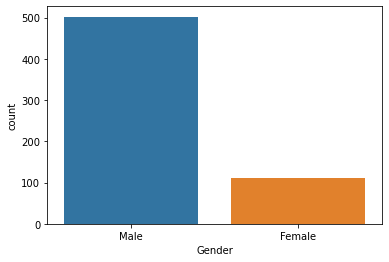

In [14]:
# categorical attributes visualization
sns.countplot(loan_data['Gender'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

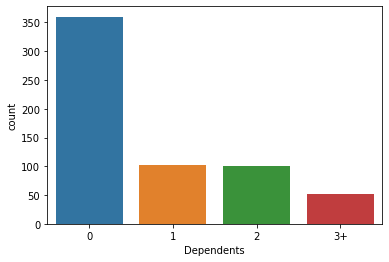

In [15]:
sns.countplot(loan_data['Dependents'])


<AxesSubplot:xlabel='Education', ylabel='count'>

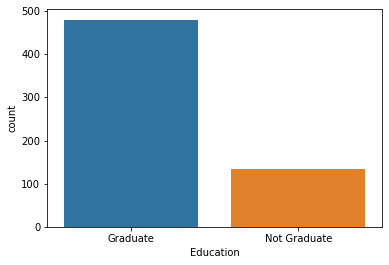

In [16]:
sns.countplot(loan_data['Education'])


<AxesSubplot:>

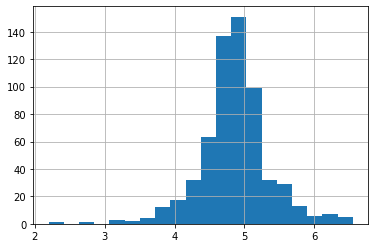

In [17]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

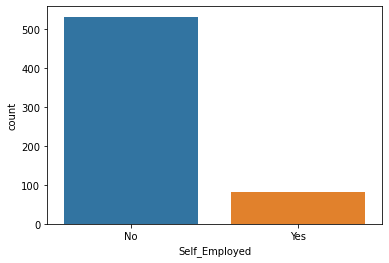

In [18]:
sns.countplot(loan_data['Self_Employed'])


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

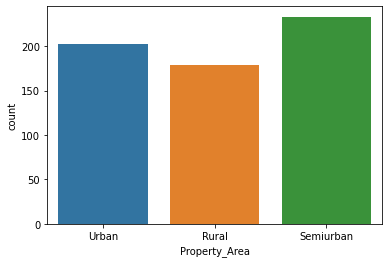

In [19]:
sns.countplot(loan_data['Property_Area'])


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

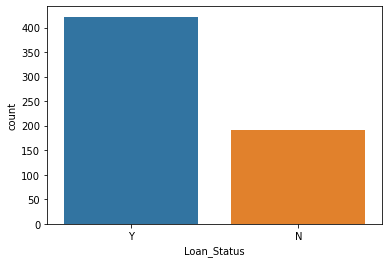

In [20]:
sns.countplot(loan_data['Loan_Status'])


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

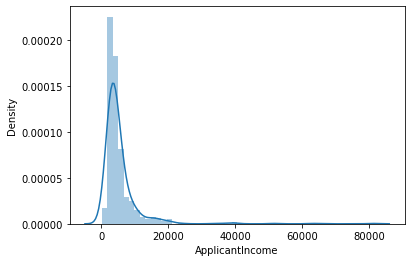

In [21]:
sns.distplot(loan_data["ApplicantIncome"])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

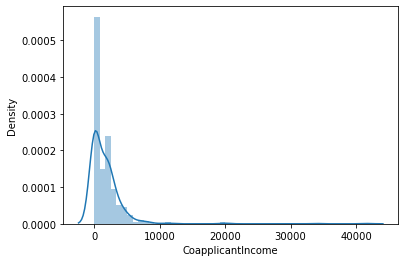

In [22]:
sns.distplot(loan_data["CoapplicantIncome"])


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

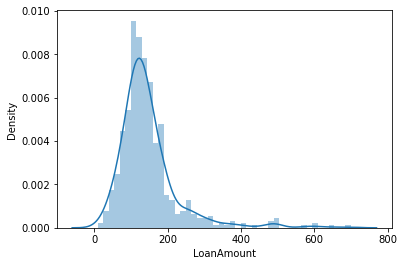

In [23]:
sns.distplot(loan_data["LoanAmount"])


In [24]:
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

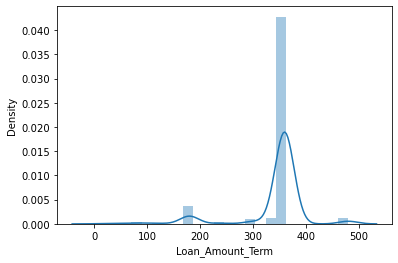

In [25]:
sns.distplot(loan_data['Loan_Amount_Term'])


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

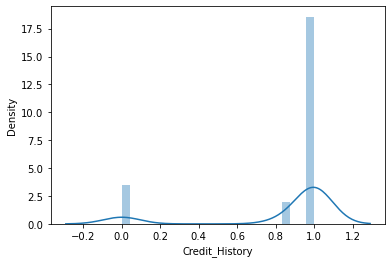

In [26]:
sns.distplot(loan_data['Credit_History'])


In [27]:
# total income
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

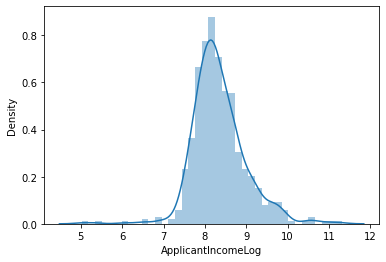

In [28]:
# apply log transformation to the attribute
loan_data['ApplicantIncomeLog'] = np.log(loan_data['ApplicantIncome']+1)
sns.distplot(loan_data["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

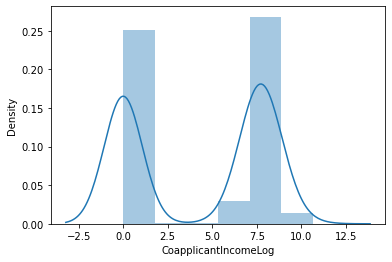

In [29]:
loan_data['CoapplicantIncomeLog'] = np.log(loan_data['CoapplicantIncome']+1)
sns.distplot(loan_data["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

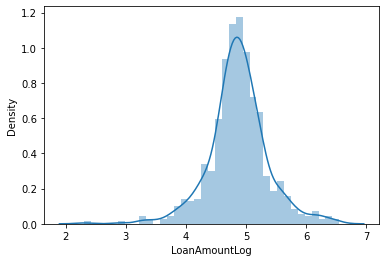

In [30]:
loan_data['LoanAmountLog'] = np.log(loan_data['LoanAmount']+1)
sns.distplot(loan_data["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

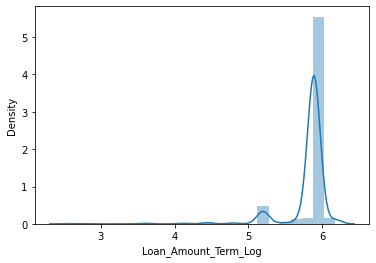

In [31]:
loan_data['Loan_Amount_Term_Log'] = np.log(loan_data['Loan_Amount_Term']+1)
sns.distplot(loan_data["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

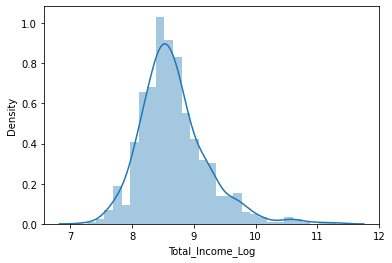

In [32]:
loan_data['Total_Income_Log'] = np.log(loan_data['Total_Income']+1)
sns.distplot(loan_data["Total_Income_Log"])


<AxesSubplot:>

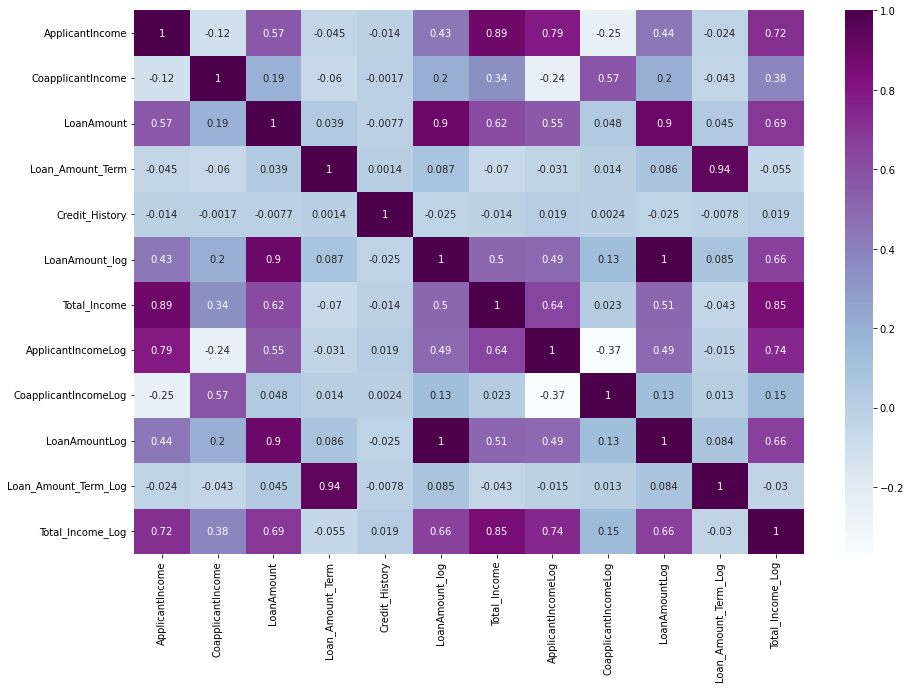

In [33]:
corr = loan_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [34]:
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [35]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loan_data = loan_data.drop(columns=cols, axis=1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.986426,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699681,4.955827,5.888878,8.699681


In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_data[col] = le.fit_transform(loan_data[col])

In [37]:
loan_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,4.986426,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,4.852030,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,4.189655,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,4.787492,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,4.948760,8.699681,4.955827,5.888878,8.699681


In [38]:
# specify input and output attributes
X = loan_data.drop(columns=['Loan_Status'], axis=1)
y = loan_data['Loan_Status']

In [39]:
train_x=X.iloc[:614,]
train_y=y
X_test=X.iloc[614:,]
seed=7

# Machine Learning Model Decision.


In [40]:
from sklearn.model_selection import train_test_split
train_x,test_X,train_y,test_y=train_test_split(train_x,train_y,random_state=seed)

In [41]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=seed)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 82.46753246753246
Cross validation is 80.9462881514061


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 71.17686258829801


In [44]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 78.18072770891644


In [45]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 78.57142857142857
Cross validation is 77.85552445688391


In [46]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 80.51948051948052
Cross validation is 79.31494069039051


In [47]:
model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
cm

array([[26, 22],
       [11, 95]], dtype=int64)

<AxesSubplot:>

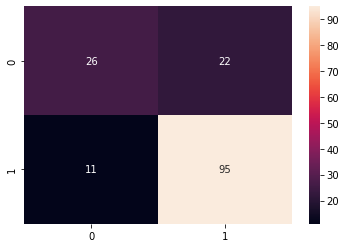

In [49]:
sns.heatmap(cm, annot=True)


# Traing the ML Model


In [50]:
logistic_model = LogisticRegression()


train_x = X.values
train_y = y.values

test_x = X.values
logistic_model.fit(train_x, train_y)

LogisticRegression()

# Predict Model

In [51]:
predicted = logistic_model.predict(test_x)
print('Coefficient of model :', logistic_model.coef_)
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)
score = logistic_model.score(train_x, train_y)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))
# predict the target on the test dataset



Coefficient of model : [[-0.1162061   0.5836866   0.02789018 -0.33145215 -0.00522535  3.33293479
   0.09158094 -0.08656618  0.08953055 -0.29489966  0.05546041  0.01675336]]
Intercept of model [-1.65502873]
accuracy_score overall : 0.8110749185667753
accuracy_score percent : 81.11


In [52]:
#Test the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = logistic_model.predict(test_X).astype(int)
print(predictions)# printing predictions



print()# Printing new line

print(confusion_matrix(test_y,predictions))
#Check precision, recall, f1-score
print(classification_report(test_y,predictions))
print(accuracy_score(test_y,predictions))



[0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]

[[ 23  25]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        48
           1       0.81      0.98      0.89       106

    accuracy                           0.82       154
   macro avg       0.86      0.73      0.76       154
weighted avg       0.84      0.82      0.81       154

0.8246753246753247


In [53]:

Loan_ID=data['ID']

In [54]:
df_output=pd.DataFrame()
Loan_ID_train,Loan_ID_test =train_test_split(Loan_ID, test_size=0.25,random_state=seed)
Loan_ID_test


220    LP001736
109    LP001384
569    LP002841
330    LP002097
407    LP002314
         ...   
515    LP002659
89     LP001310
65     LP001225
478    LP002531
329    LP002087
Name: ID, Length: 154, dtype: object

In [64]:
df_output['Loan_ID']=Loan_ID_test
df_output['Loan_status']=predictions
df_output['Loan_status'].replace(0, 'N', inplace=True)
df_output['Loan_status'].replace(1, 'Y', inplace=True)
df_output

,Loan_ID,Loan_status
220,LP001736,N
109,LP001384,Y
569,LP002841,N
330,LP002097,Y
407,LP002314,Y
...,...,...
515,LP002659,Y
89,LP001310,Y
65,LP001225,Y
478,LP002531,Y


# to save output in csv file

In [62]:
df_output[['Loan_ID','Loan_status']].to_csv(r'C:\Users\pp928\OneDrive\Desktop\project1\file.csv', index=False)